In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import ReLU
from torch.nn import LeakyReLU
from torch.nn import Sigmoid
from torch.nn import Tanh
from torch.nn import ELU
from torch.nn import Conv2d
from torch.nn import AvgPool2d
from torch.nn import MaxPool2d
from torch import flatten
import time

#### Prepare for Dataset

In [28]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


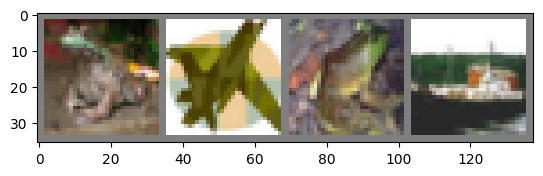

 frog plane  frog  ship


In [29]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Choose a Device

In [30]:
print(torch.backends.cudnn.enabled)

True


In [31]:
torch.cuda.is_available()

False

In [32]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cpu


### Try different activation function

ReLU()
[epoch: 0, i:  4999] avg mini-batch loss: 1.883
[epoch: 0, i:  9999] avg mini-batch loss: 1.566
[epoch: 1, i:  4999] avg mini-batch loss: 1.338
[epoch: 1, i:  9999] avg mini-batch loss: 1.277
[epoch: 2, i:  4999] avg mini-batch loss: 1.167
[epoch: 2, i:  9999] avg mini-batch loss: 1.149
[epoch: 3, i:  4999] avg mini-batch loss: 1.050
[epoch: 3, i:  9999] avg mini-batch loss: 1.030
[epoch: 4, i:  4999] avg mini-batch loss: 0.931
[epoch: 4, i:  9999] avg mini-batch loss: 0.946
[epoch: 5, i:  4999] avg mini-batch loss: 0.842
[epoch: 5, i:  9999] avg mini-batch loss: 0.859
[epoch: 6, i:  4999] avg mini-batch loss: 0.754
[epoch: 6, i:  9999] avg mini-batch loss: 0.803
[epoch: 7, i:  4999] avg mini-batch loss: 0.691
[epoch: 7, i:  9999] avg mini-batch loss: 0.728
[epoch: 8, i:  4999] avg mini-batch loss: 0.627
[epoch: 8, i:  9999] avg mini-batch loss: 0.660
[epoch: 9, i:  4999] avg mini-batch loss: 0.561
[epoch: 9, i:  9999] avg mini-batch loss: 0.611
Finished Training.
6.423554392655

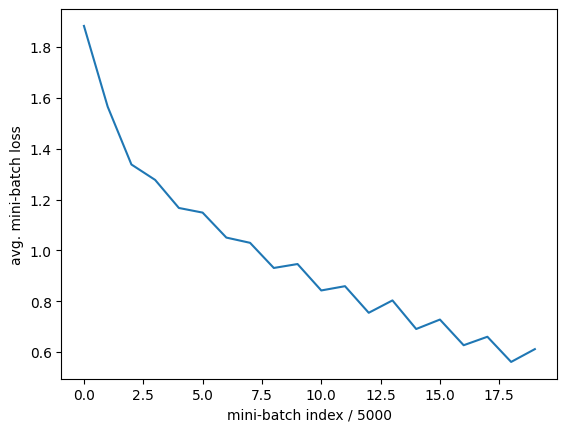

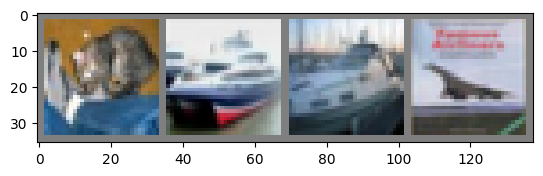

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane
Accuracy of the network on the 10000 test images: 65 %
Accuracy of plane : 74 %
Accuracy of   car : 76 %
Accuracy of  bird : 49 %
Accuracy of   cat : 37 %
Accuracy of  deer : 59 %
Accuracy of   dog : 64 %
Accuracy of  frog : 70 %
Accuracy of horse : 69 %
Accuracy of  ship : 82 %
Accuracy of truck : 70 %
LeakyReLU(negative_slope=0.01)
[epoch: 0, i:  4999] avg mini-batch loss: 1.891
[epoch: 0, i:  9999] avg mini-batch loss: 1.538
[epoch: 1, i:  4999] avg mini-batch loss: 1.350
[epoch: 1, i:  9999] avg mini-batch loss: 1.267
[epoch: 2, i:  4999] avg mini-batch loss: 1.151
[epoch: 2, i:  9999] avg mini-batch loss: 1.115
[epoch: 3, i:  4999] avg mini-batch loss: 1.025
[epoch: 3, i:  9999] avg mini-batch loss: 1.014
[epoch: 4, i:  4999] avg mini-batch loss: 0.930
[epoch: 4, i:  9999] avg mini-batch loss: 0.931
[epoch: 5, i:  4999] avg mini-batch loss: 0.844
[epoch: 5, i:  9999] avg mini-batch loss: 0.862
[epoch: 6, i: 

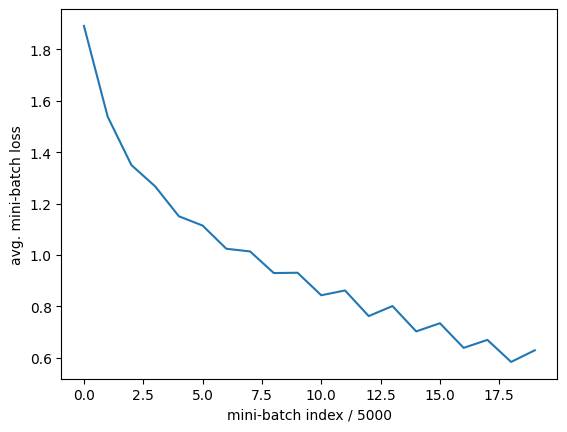

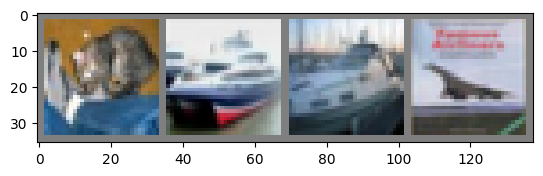

GroundTruth:    cat  ship  ship plane
Predicted:    dog  ship plane plane
Accuracy of the network on the 10000 test images: 66 %
Accuracy of plane : 71 %
Accuracy of   car : 68 %
Accuracy of  bird : 46 %
Accuracy of   cat : 38 %
Accuracy of  deer : 57 %
Accuracy of   dog : 70 %
Accuracy of  frog : 73 %
Accuracy of horse : 76 %
Accuracy of  ship : 80 %
Accuracy of truck : 79 %
Sigmoid()
[epoch: 0, i:  4999] avg mini-batch loss: 2.313
[epoch: 0, i:  9999] avg mini-batch loss: 2.305
[epoch: 1, i:  4999] avg mini-batch loss: 2.303
[epoch: 1, i:  9999] avg mini-batch loss: 2.298
[epoch: 2, i:  4999] avg mini-batch loss: 2.083
[epoch: 2, i:  9999] avg mini-batch loss: 2.014
[epoch: 3, i:  4999] avg mini-batch loss: 1.936
[epoch: 3, i:  9999] avg mini-batch loss: 1.874
[epoch: 4, i:  4999] avg mini-batch loss: 1.790
[epoch: 4, i:  9999] avg mini-batch loss: 1.742
[epoch: 5, i:  4999] avg mini-batch loss: 1.701
[epoch: 5, i:  9999] avg mini-batch loss: 1.667
[epoch: 6, i:  4999] avg mini-batch

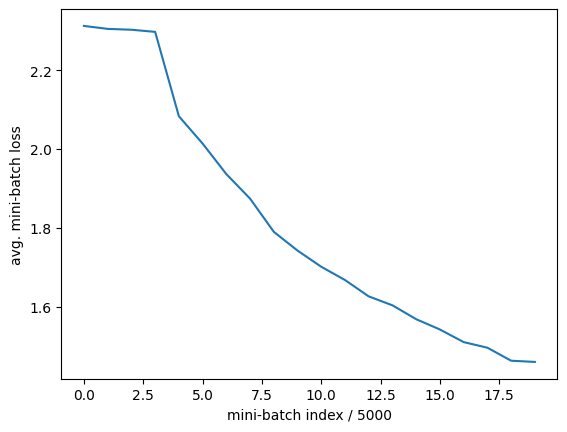

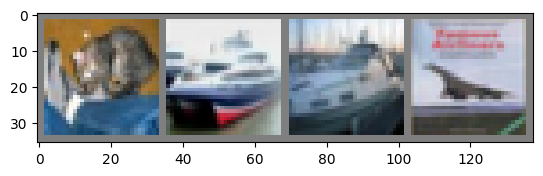

GroundTruth:    cat  ship  ship plane
Predicted:    cat   car   car  ship
Accuracy of the network on the 10000 test images: 48 %
Accuracy of plane : 58 %
Accuracy of   car : 66 %
Accuracy of  bird : 28 %
Accuracy of   cat : 32 %
Accuracy of  deer : 34 %
Accuracy of   dog : 42 %
Accuracy of  frog : 60 %
Accuracy of horse : 52 %
Accuracy of  ship : 61 %
Accuracy of truck : 48 %
Tanh()
[epoch: 0, i:  4999] avg mini-batch loss: 1.829
[epoch: 0, i:  9999] avg mini-batch loss: 1.616
[epoch: 1, i:  4999] avg mini-batch loss: 1.457
[epoch: 1, i:  9999] avg mini-batch loss: 1.411
[epoch: 2, i:  4999] avg mini-batch loss: 1.311
[epoch: 2, i:  9999] avg mini-batch loss: 1.315
[epoch: 3, i:  4999] avg mini-batch loss: 1.237
[epoch: 3, i:  9999] avg mini-batch loss: 1.201
[epoch: 4, i:  4999] avg mini-batch loss: 1.135
[epoch: 4, i:  9999] avg mini-batch loss: 1.160
[epoch: 5, i:  4999] avg mini-batch loss: 1.083
[epoch: 5, i:  9999] avg mini-batch loss: 1.079
[epoch: 6, i:  4999] avg mini-batch lo

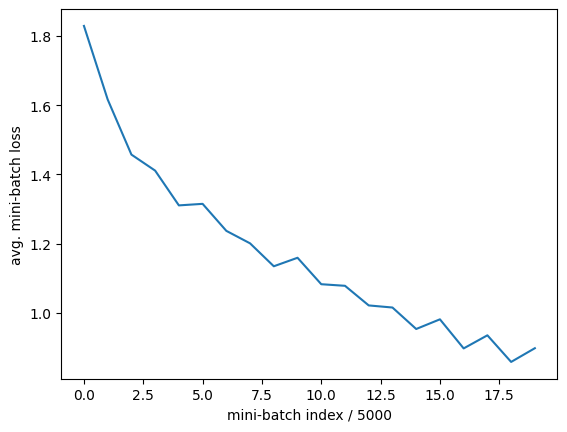

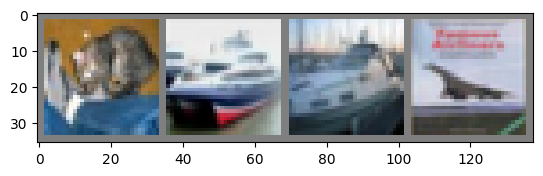

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane
Accuracy of the network on the 10000 test images: 59 %
Accuracy of plane : 67 %
Accuracy of   car : 65 %
Accuracy of  bird : 46 %
Accuracy of   cat : 48 %
Accuracy of  deer : 55 %
Accuracy of   dog : 46 %
Accuracy of  frog : 53 %
Accuracy of horse : 76 %
Accuracy of  ship : 67 %
Accuracy of truck : 69 %
ELU(alpha=1.0)
[epoch: 0, i:  4999] avg mini-batch loss: 1.805
[epoch: 0, i:  9999] avg mini-batch loss: 1.564
[epoch: 1, i:  4999] avg mini-batch loss: 1.384
[epoch: 1, i:  9999] avg mini-batch loss: 1.342
[epoch: 2, i:  4999] avg mini-batch loss: 1.219
[epoch: 2, i:  9999] avg mini-batch loss: 1.191
[epoch: 3, i:  4999] avg mini-batch loss: 1.091
[epoch: 3, i:  9999] avg mini-batch loss: 1.067
[epoch: 4, i:  4999] avg mini-batch loss: 0.975
[epoch: 4, i:  9999] avg mini-batch loss: 0.993
[epoch: 5, i:  4999] avg mini-batch loss: 0.880
[epoch: 5, i:  9999] avg mini-batch loss: 0.905
[epoch: 6, i:  4999] avg mini-

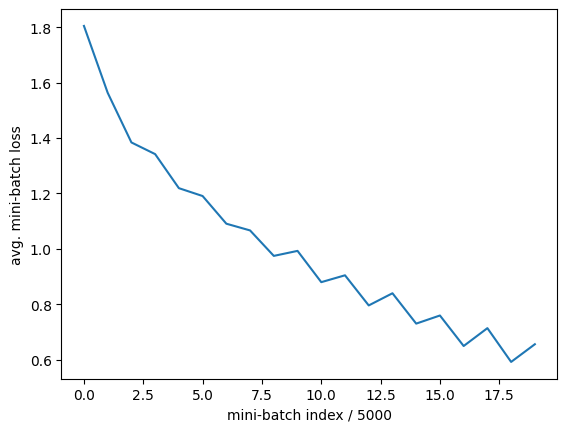

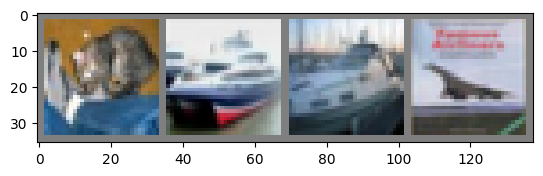

GroundTruth:    cat  ship  ship plane
Predicted:    dog  ship plane plane
Accuracy of the network on the 10000 test images: 63 %
Accuracy of plane : 66 %
Accuracy of   car : 72 %
Accuracy of  bird : 50 %
Accuracy of   cat : 45 %
Accuracy of  deer : 44 %
Accuracy of   dog : 56 %
Accuracy of  frog : 72 %
Accuracy of horse : 74 %
Accuracy of  ship : 78 %
Accuracy of truck : 71 %


In [33]:
f_list = [ReLU(), LeakyReLU(), Sigmoid(), Tanh(), ELU()]

for f in f_list: 
    print(f)
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            ###### Fill the blank here ######

            #block one
            self.c_1 = Conv2d(3, 10, 3, stride=1, padding=1)
            self.r_1 = f
            self.avg_1 = AvgPool2d(2)

            #block two
            self.c_2 = Conv2d(10, 20, 3, stride=1, padding=1)
            self.r_2 = f
            self.avg_2 = AvgPool2d(2)

            self.l_1 = nn.Linear(1280, 100)
            self.r_3 = f
            self.l_2 = nn.Linear(100, 10)

        def forward(self, x):
            ###### Fill the blank here ######

            #print(x.shape)
            x = self.c_1(x)
            #print(x.shape)
            x = self.r_1(x)
            #print(x.shape)
            x = self.avg_1(x)
            #print(x.shape)

            x = self.c_2(x)
            #print(x.shape)
            x = self.r_2(x)
            #print(x.shape)
            x = self.avg_2(x)
            #print(x.shape)

            x = flatten(x, start_dim=1)
            #print(x.shape)

            x = self.l_1(x)
            #print(x.shape)
            x = self.r_3(x)
            #print(x.shape)
            x = self.l_2(x)
            #print(x.shape)


            return x

    net = Net()     # Create the network instance.
    net.to(device)  # Move the network parameters to the specified device.

    # We use cross-entropy as loss function.
    loss_func = nn.CrossEntropyLoss()

    # SGD
    opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 


    # Training procedure
    st = time.time()
    avg_losses = []   # Avg. losses.
    epochs = 10       # Total epochs.
    print_freq = 5000  # Print frequency.

    for epoch in range(epochs):  # Loop over the dataset multiple times.
        running_loss = 0.0       # Initialize running loss.
        for i, data in enumerate(trainloader, 0):
            # Get the inputs.
            inputs, labels = data
    #         print(inputs)
    #         print(labels)
            # Move the inputs to the specified device.
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients.
            opt.zero_grad()

            # Forward step.
            outputs = net(inputs)
            loss = loss_func(outputs, labels)

            # Backward step.
            loss.backward()

            # Optimization step (update the parameters).
            opt.step()

            # Print statistics.
            running_loss += loss.item()
            if i % print_freq == print_freq - 1: # Print every several mini-batches.
                avg_loss = running_loss / print_freq
                print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                    epoch, i, avg_loss))
                avg_losses.append(avg_loss)
                running_loss = 0.0

    print('Finished Training.')
    et = time.time()
    print((et-st)/60)

    plt.plot(avg_losses)
    plt.xlabel('mini-batch index / {}'.format(print_freq))
    plt.ylabel('avg. mini-batch loss')
    plt.show()


    # Check several images.
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
    outputs = net(images.to(device))
    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))


    # Get test accuracy.
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))


    # Get test accuracy for each class.
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

### Try different optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
[epoch: 0, i:  4999] avg mini-batch loss: 1.905
[epoch: 0, i:  9999] avg mini-batch loss: 1.565
[epoch: 1, i:  4999] avg mini-batch loss: 1.334
[epoch: 1, i:  9999] avg mini-batch loss: 1.274
[epoch: 2, i:  4999] avg mini-batch loss: 1.147
[epoch: 2, i:  9999] avg mini-batch loss: 1.129
[epoch: 3, i:  4999] avg mini-batch loss: 1.020
[epoch: 3, i:  9999] avg mini-batch loss: 1.029
[epoch: 4, i:  4999] avg mini-batch loss: 0.935
[epoch: 4, i:  9999] avg mini-batch loss: 0.957
[epoch: 5, i:  4999] avg mini-batch loss: 0.855
[epoch: 5, i:  9999] avg mini-batch loss: 0.864
[epoch: 6, i:  4999] avg mini-batch loss: 0.788
[epoch: 6, i:  9999] avg mini-batch loss: 0.799
[epoch: 7, i:  4999] avg mini-batch loss: 0.710
[epoch: 7, i:  9999] avg mini-batch loss: 0.744
[epoch: 8, i:  4999] avg mini-batch loss: 0.648
[epoc

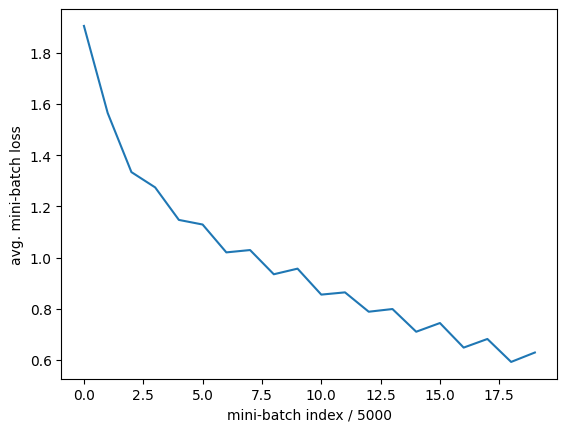

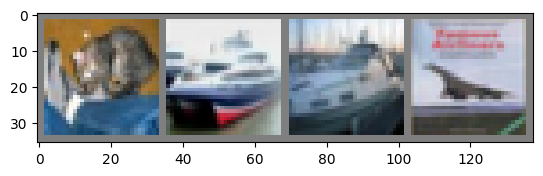

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane
Accuracy of the network on the 10000 test images: 66 %
Accuracy of plane : 69 %
Accuracy of   car : 75 %
Accuracy of  bird : 55 %
Accuracy of   cat : 47 %
Accuracy of  deer : 63 %
Accuracy of   dog : 52 %
Accuracy of  frog : 69 %
Accuracy of horse : 77 %
Accuracy of  ship : 78 %
Accuracy of truck : 70 %
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
)
[epoch: 0, i:  4999] avg mini-batch loss: 0.838
[epoch: 0, i:  9999] avg mini-batch loss: 0.888
[epoch: 1, i:  4999] avg mini-batch loss: 0.716
[epoch: 1, i:  9999] avg mini-batch loss: 0.781
[epoch: 2, i:  4999] avg mini-batch loss: 0.604
[epoch: 2, i:  9999] avg mini-batch loss: 0.654
[epoch: 3, i:  4999] avg mini-batch loss: 0.512
[epoch: 3, i:  9999] avg mini-batch loss: 0.565
[epoch: 4, i:  

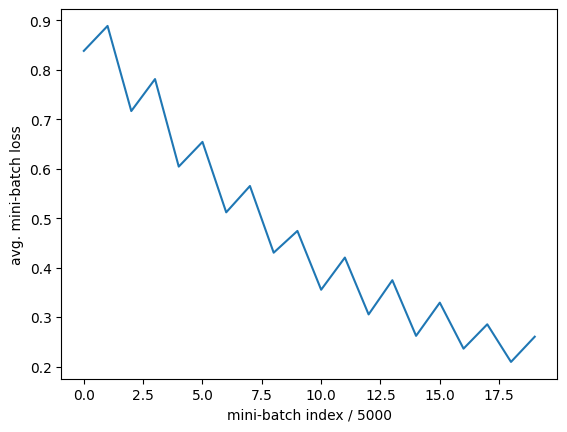

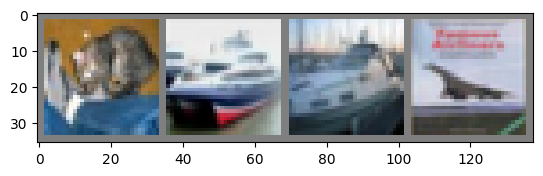

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship plane
Accuracy of the network on the 10000 test images: 64 %
Accuracy of plane : 73 %
Accuracy of   car : 75 %
Accuracy of  bird : 51 %
Accuracy of   cat : 38 %
Accuracy of  deer : 54 %
Accuracy of   dog : 56 %
Accuracy of  frog : 73 %
Accuracy of horse : 74 %
Accuracy of  ship : 75 %
Accuracy of truck : 73 %
Adagrad (
Parameter Group 0
    eps: 1e-10
    foreach: None
    initial_accumulator_value: 0
    lr: 0.01
    lr_decay: 0
    maximize: False
    weight_decay: 0
)
[epoch: 0, i:  4999] avg mini-batch loss: 0.112
[epoch: 0, i:  9999] avg mini-batch loss: 0.077
[epoch: 1, i:  4999] avg mini-batch loss: 0.043
[epoch: 1, i:  9999] avg mini-batch loss: 0.043
[epoch: 2, i:  4999] avg mini-batch loss: 0.032
[epoch: 2, i:  9999] avg mini-batch loss: 0.034
[epoch: 3, i:  4999] avg mini-batch loss: 0.027
[epoch: 3, i:  9999] avg mini-batch loss: 0.029
[epoch: 4, i:  4999] avg mini-batch loss: 0.023
[epoch: 4, i:  9999] avg

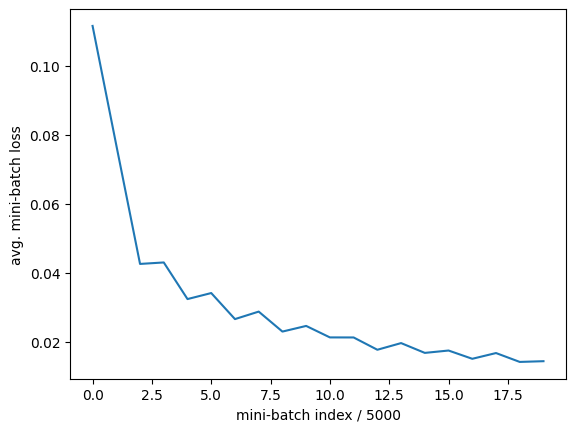

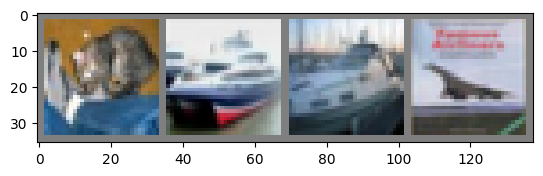

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane
Accuracy of the network on the 10000 test images: 66 %
Accuracy of plane : 70 %
Accuracy of   car : 78 %
Accuracy of  bird : 54 %
Accuracy of   cat : 48 %
Accuracy of  deer : 60 %
Accuracy of   dog : 54 %
Accuracy of  frog : 74 %
Accuracy of horse : 71 %
Accuracy of  ship : 76 %
Accuracy of truck : 74 %
Adadelta (
Parameter Group 0
    eps: 1e-06
    foreach: None
    lr: 1.0
    maximize: False
    rho: 0.9
    weight_decay: 0
)
[epoch: 0, i:  4999] avg mini-batch loss: 0.093
[epoch: 0, i:  9999] avg mini-batch loss: 0.122
[epoch: 1, i:  4999] avg mini-batch loss: 0.095
[epoch: 1, i:  9999] avg mini-batch loss: 0.114
[epoch: 2, i:  4999] avg mini-batch loss: 0.097
[epoch: 2, i:  9999] avg mini-batch loss: 0.122
[epoch: 3, i:  4999] avg mini-batch loss: 0.093
[epoch: 3, i:  9999] avg mini-batch loss: 0.119
[epoch: 4, i:  4999] avg mini-batch loss: 0.089
[epoch: 4, i:  9999] avg mini-batch loss: 0.108
[epoch: 5, i

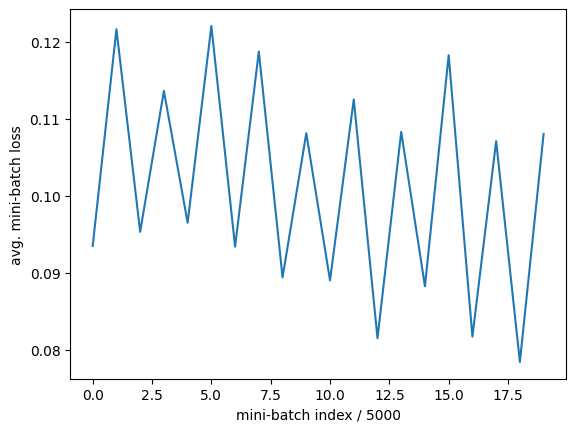

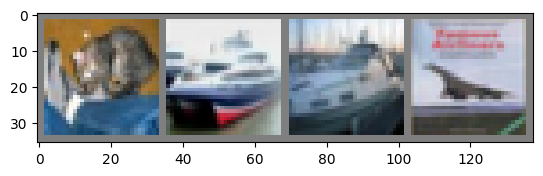

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane
Accuracy of the network on the 10000 test images: 64 %
Accuracy of plane : 71 %
Accuracy of   car : 78 %
Accuracy of  bird : 51 %
Accuracy of   cat : 46 %
Accuracy of  deer : 56 %
Accuracy of   dog : 52 %
Accuracy of  frog : 72 %
Accuracy of horse : 67 %
Accuracy of  ship : 80 %
Accuracy of truck : 70 %
AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)
[epoch: 0, i:  4999] avg mini-batch loss: 0.208
[epoch: 0, i:  9999] avg mini-batch loss: 0.254
[epoch: 1, i:  4999] avg mini-batch loss: 0.192
[epoch: 1, i:  9999] avg mini-batch loss: 0.243
[epoch: 2, i:  4999] avg mini-batch loss: 0.180
[epoch: 2, i:  9999] avg mini-batch loss: 0.239
[epoch: 3, i:  4999] avg mini-batch loss: 0.194
[epoch: 3, i:  9999] avg mini-batch loss: 0.253
[epoch: 4, i:  4999] avg mini-batch loss: 0.208
[epoch

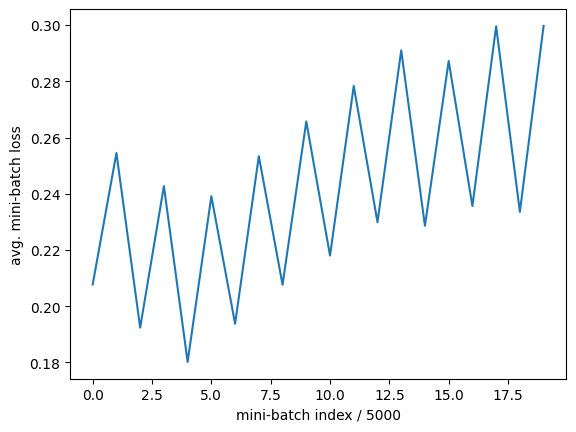

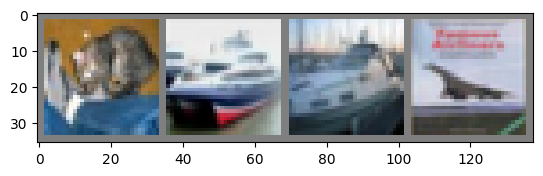

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship truck plane
Accuracy of the network on the 10000 test images: 64 %
Accuracy of plane : 64 %
Accuracy of   car : 76 %
Accuracy of  bird : 52 %
Accuracy of   cat : 45 %
Accuracy of  deer : 58 %
Accuracy of   dog : 60 %
Accuracy of  frog : 69 %
Accuracy of horse : 68 %
Accuracy of  ship : 78 %
Accuracy of truck : 75 %
Adamax (
Parameter Group 0
    betas: (0.9, 0.999)
    eps: 1e-08
    foreach: None
    lr: 0.002
    maximize: False
    weight_decay: 0
)
[epoch: 0, i:  4999] avg mini-batch loss: 0.123
[epoch: 0, i:  9999] avg mini-batch loss: 0.100
[epoch: 1, i:  4999] avg mini-batch loss: 0.055
[epoch: 1, i:  9999] avg mini-batch loss: 0.057
[epoch: 2, i:  4999] avg mini-batch loss: 0.036
[epoch: 2, i:  9999] avg mini-batch loss: 0.033
[epoch: 3, i:  4999] avg mini-batch loss: 0.020
[epoch: 3, i:  9999] avg mini-batch loss: 0.022
[epoch: 4, i:  4999] avg mini-batch loss: 0.013
[epoch: 4, i:  9999] avg mini-batch loss: 0.015
[

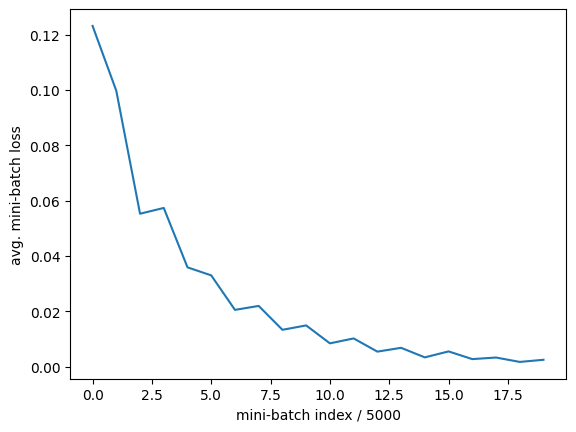

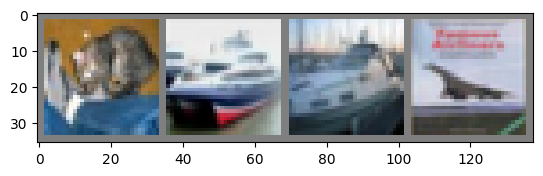

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane
Accuracy of the network on the 10000 test images: 66 %
Accuracy of plane : 69 %
Accuracy of   car : 79 %
Accuracy of  bird : 58 %
Accuracy of   cat : 46 %
Accuracy of  deer : 60 %
Accuracy of   dog : 55 %
Accuracy of  frog : 70 %
Accuracy of horse : 73 %
Accuracy of  ship : 77 %
Accuracy of truck : 72 %
RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    weight_decay: 0
)
[epoch: 0, i:  4999] avg mini-batch loss: 2.161
[epoch: 0, i:  9999] avg mini-batch loss: 1.870
[epoch: 1, i:  4999] avg mini-batch loss: 1.784
[epoch: 1, i:  9999] avg mini-batch loss: 1.813
[epoch: 2, i:  4999] avg mini-batch loss: 1.765
[epoch: 2, i:  9999] avg mini-batch loss: 1.795
[epoch: 3, i:  4999] avg mini-batch loss: 1.743
[epoch: 3, i:  9999] avg mini-batch loss: 1.790
[epoch: 4, i:  4999] avg mini-batch loss: 1

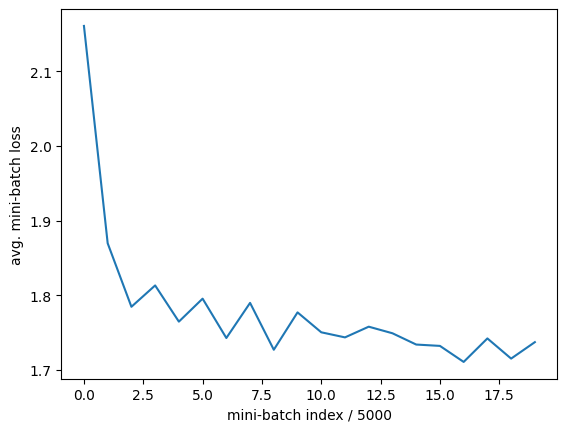

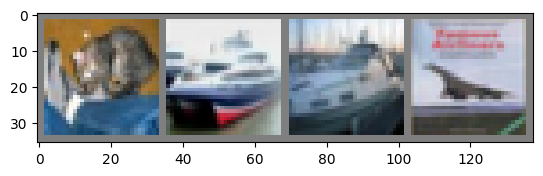

GroundTruth:    cat  ship  ship plane
Predicted:   frog truck truck  ship
Accuracy of the network on the 10000 test images: 39 %
Accuracy of plane : 36 %
Accuracy of   car : 56 %
Accuracy of  bird : 20 %
Accuracy of   cat : 16 %
Accuracy of  deer : 28 %
Accuracy of   dog : 30 %
Accuracy of  frog : 65 %
Accuracy of horse : 34 %
Accuracy of  ship : 43 %
Accuracy of truck : 61 %


In [26]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ###### Fill the blank here ######

        #block one
        self.c_1 = Conv2d(3, 10, 3, stride=1, padding=1)
        self.r_1 = ReLU()
        self.avg_1 = AvgPool2d(2)

        #block two
        self.c_2 = Conv2d(10, 20, 3, stride=1, padding=1)
        self.r_2 = ReLU()
        self.avg_2 = AvgPool2d(2)

        self.l_1 = nn.Linear(1280, 100)
        self.r_3 = ReLU()
        self.l_2 = nn.Linear(100, 10)

    def forward(self, x):
        ###### Fill the blank here ######

        #print(x.shape)
        x = self.c_1(x)
        #print(x.shape)
        x = self.r_1(x)
        #print(x.shape)
        x = self.avg_1(x)
        #print(x.shape)

        x = self.c_2(x)
        #print(x.shape)
        x = self.r_2(x)
        #print(x.shape)
        x = self.avg_2(x)
        #print(x.shape)

        x = flatten(x, start_dim=1)
        #print(x.shape)

        x = self.l_1(x)
        #print(x.shape)
        x = self.r_3(x)
        #print(x.shape)
        x = self.l_2(x)
        #print(x.shape)


        return x

net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

opt_list = [optim.SGD(net.parameters(), lr=0.001, momentum=0.9), 
            optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False), 
            optim.Adagrad(net.parameters(), lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10), 
            optim.Adadelta(net.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0), 
            optim.AdamW(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False),
            optim.Adamax(net.parameters(), lr=0.002, betas=(0.9, 0.999), eps=1e-08, weight_decay=0),
            optim.RMSprop(net.parameters(), lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)]

# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()

for opt in opt_list:
    # SGD
    opt = opt
    print(opt)
    # Training procedure
    st = time.time()
    avg_losses = []   # Avg. losses.
    epochs = 10       # Total epochs.
    print_freq = 5000  # Print frequency.

    for epoch in range(epochs):  # Loop over the dataset multiple times.
        running_loss = 0.0       # Initialize running loss.
        for i, data in enumerate(trainloader, 0):
            # Get the inputs.
            inputs, labels = data
    #         print(inputs)
    #         print(labels)
            # Move the inputs to the specified device.
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients.
            opt.zero_grad()

            # Forward step.
            outputs = net(inputs)
            loss = loss_func(outputs, labels)

            # Backward step.
            loss.backward()

            # Optimization step (update the parameters).
            opt.step()

            # Print statistics.
            running_loss += loss.item()
            if i % print_freq == print_freq - 1: # Print every several mini-batches.
                avg_loss = running_loss / print_freq
                print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                    epoch, i, avg_loss))
                avg_losses.append(avg_loss)
                running_loss = 0.0

    print('Finished Training.')
    et = time.time()
    print((et-st)/60)

    plt.plot(avg_losses)
    plt.xlabel('mini-batch index / {}'.format(print_freq))
    plt.ylabel('avg. mini-batch loss')
    plt.show()


    # Check several images.
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
    outputs = net(images.to(device))
    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))


    # Get test accuracy.
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (
        100 * correct / total))


    # Get test accuracy for each class.
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            for i in range(4):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(10):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))

### Try different pooling

[epoch: 0, i:  4999] avg mini-batch loss: 1.743
[epoch: 0, i:  9999] avg mini-batch loss: 1.397
[epoch: 1, i:  4999] avg mini-batch loss: 1.158
[epoch: 1, i:  9999] avg mini-batch loss: 1.092
[epoch: 2, i:  4999] avg mini-batch loss: 0.964
[epoch: 2, i:  9999] avg mini-batch loss: 0.948
[epoch: 3, i:  4999] avg mini-batch loss: 0.841
[epoch: 3, i:  9999] avg mini-batch loss: 0.832
[epoch: 4, i:  4999] avg mini-batch loss: 0.722
[epoch: 4, i:  9999] avg mini-batch loss: 0.768
[epoch: 5, i:  4999] avg mini-batch loss: 0.647
[epoch: 5, i:  9999] avg mini-batch loss: 0.690
[epoch: 6, i:  4999] avg mini-batch loss: 0.576
[epoch: 6, i:  9999] avg mini-batch loss: 0.622
[epoch: 7, i:  4999] avg mini-batch loss: 0.512
[epoch: 7, i:  9999] avg mini-batch loss: 0.566
[epoch: 8, i:  4999] avg mini-batch loss: 0.450
[epoch: 8, i:  9999] avg mini-batch loss: 0.514
[epoch: 9, i:  4999] avg mini-batch loss: 0.408
[epoch: 9, i:  9999] avg mini-batch loss: 0.472
Finished Training.
6.92808278799057


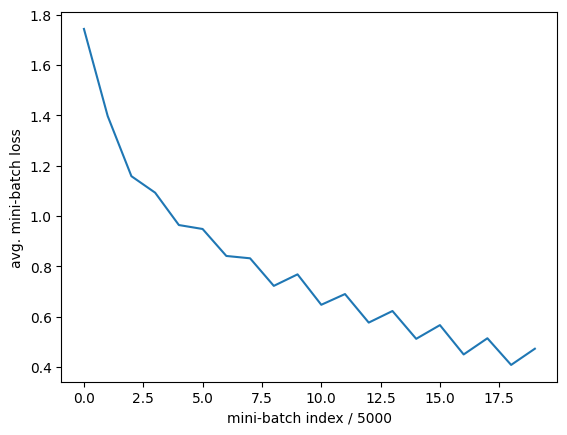

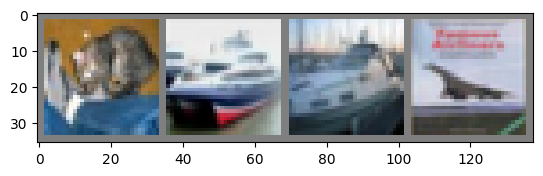

GroundTruth:    cat  ship  ship plane
Predicted:    dog  ship  ship plane
Accuracy of the network on the 10000 test images: 65 %
Accuracy of plane : 66 %
Accuracy of   car : 79 %
Accuracy of  bird : 60 %
Accuracy of   cat : 40 %
Accuracy of  deer : 63 %
Accuracy of   dog : 51 %
Accuracy of  frog : 72 %
Accuracy of horse : 70 %
Accuracy of  ship : 86 %
Accuracy of truck : 68 %


In [36]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ###### Fill the blank here ######

        #block one
        self.c_1 = Conv2d(3, 10, 3, stride=1, padding=1)
        self.r_1 = ReLU()
        self.max_1 = MaxPool2d(2)

        #block two
        self.c_2 = Conv2d(10, 20, 3, stride=1, padding=1)
        self.r_2 = ReLU()
        self.max_2 = MaxPool2d(2)

        self.l_1 = nn.Linear(1280, 100)
        self.r_3 = ReLU()
        self.l_2 = nn.Linear(100, 10)

    def forward(self, x):
        ###### Fill the blank here ######

        #print(x.shape)
        x = self.c_1(x)
        #print(x.shape)
        x = self.r_1(x)
        #print(x.shape)
        x = self.max_1(x)
        #print(x.shape)

        x = self.c_2(x)
        #print(x.shape)
        x = self.r_2(x)
        #print(x.shape)
        x = self.max_2(x)
        #print(x.shape)

        x = flatten(x, start_dim=1)
        #print(x.shape)

        x = self.l_1(x)
        #print(x.shape)
        x = self.r_3(x)
        #print(x.shape)
        x = self.l_2(x)
        #print(x.shape)


        return x

net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()

# SGD
opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 


# Training procedure
st = time.time()
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 5000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
#         print(inputs)
#         print(labels)
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')
et = time.time()
print((et-st)/60)

plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()


# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

### Add more layers:

[epoch: 0, i:  4999] avg mini-batch loss: 2.293
[epoch: 0, i:  9999] avg mini-batch loss: 2.037
[epoch: 1, i:  4999] avg mini-batch loss: 1.770
[epoch: 1, i:  9999] avg mini-batch loss: 1.630
[epoch: 2, i:  4999] avg mini-batch loss: 1.465
[epoch: 2, i:  9999] avg mini-batch loss: 1.405
[epoch: 3, i:  4999] avg mini-batch loss: 1.326
[epoch: 3, i:  9999] avg mini-batch loss: 1.263
[epoch: 4, i:  4999] avg mini-batch loss: 1.190
[epoch: 4, i:  9999] avg mini-batch loss: 1.180
[epoch: 5, i:  4999] avg mini-batch loss: 1.109
[epoch: 5, i:  9999] avg mini-batch loss: 1.098
[epoch: 6, i:  4999] avg mini-batch loss: 1.037
[epoch: 6, i:  9999] avg mini-batch loss: 1.041
[epoch: 7, i:  4999] avg mini-batch loss: 0.978
[epoch: 7, i:  9999] avg mini-batch loss: 0.985
[epoch: 8, i:  4999] avg mini-batch loss: 0.946
[epoch: 8, i:  9999] avg mini-batch loss: 0.931
[epoch: 9, i:  4999] avg mini-batch loss: 0.898
[epoch: 9, i:  9999] avg mini-batch loss: 0.893
Finished Training.
8.738886654376984


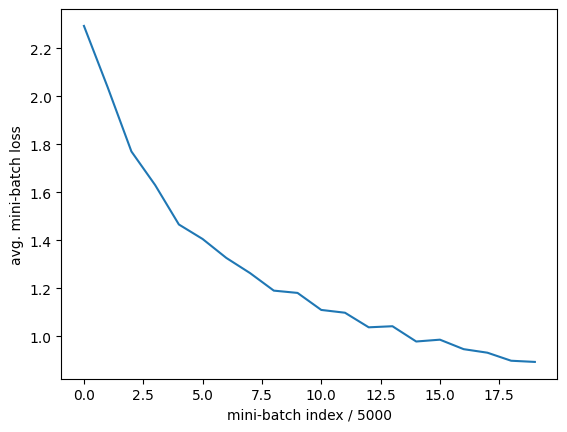

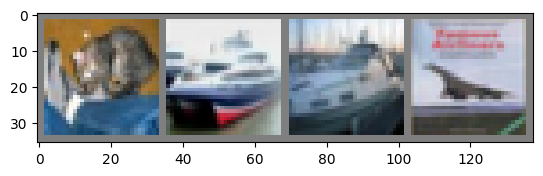

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane
Accuracy of the network on the 10000 test images: 65 %
Accuracy of plane : 77 %
Accuracy of   car : 81 %
Accuracy of  bird : 52 %
Accuracy of   cat : 46 %
Accuracy of  deer : 62 %
Accuracy of   dog : 45 %
Accuracy of  frog : 72 %
Accuracy of horse : 72 %
Accuracy of  ship : 74 %
Accuracy of truck : 73 %


In [38]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        ###### Fill the blank here ######

        #block one
        self.c_1 = Conv2d(3, 10, 3, stride=1, padding=1)
        self.r_1 = ReLU()
        self.avg_1 = AvgPool2d(2)

        #block two
        self.c_2 = Conv2d(10, 20, 3, stride=1, padding=1)
        self.r_2 = ReLU()
        self.avg_2 = AvgPool2d(2)

        #Block three
        self.c_3 = Conv2d(20, 30, 3, stride=1, padding=1)
        self.r_3 = ReLU()
        self.avg_3 = AvgPool2d(2)
        
        #Block four
        self.c_4 = Conv2d(30, 40, 3, stride=1, padding=1)
        self.r_4 = ReLU()
        self.avg_4 = AvgPool2d(2)
        
        
        self.l_1 = nn.Linear(160, 100)
        self.r_3 = ReLU()
        self.l_2 = nn.Linear(100, 10)

    def forward(self, x):
        ###### Fill the blank here ######

        #print(x.shape)
        x = self.c_1(x)
        #print(x.shape)
        x = self.r_1(x)
        #print(x.shape)
        x = self.avg_1(x)
        #print(x.shape)

        x = self.c_2(x)
        #print(x.shape)
        x = self.r_2(x)
        #print(x.shape)
        x = self.avg_2(x)
        #print(x.shape)

        x = self.c_3(x)
        #print(x.shape)
        x = self.r_3(x)
        #print(x.shape)
        x = self.avg_3(x)
        
        x = self.c_4(x)
        #print(x.shape)
        x = self.r_4(x)
        #print(x.shape)
        x = self.avg_4(x)
        
        x = flatten(x, start_dim=1)
        #print(x.shape)

        x = self.l_1(x)
        #print(x.shape)
        x = self.r_3(x)
        #print(x.shape)
        x = self.l_2(x)
        #print(x.shape)

        return x

net = Net()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()

# SGD
opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 


# Training procedure
st = time.time()
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 5000  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
#         print(inputs)
#         print(labels)
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)

        # Backward step.
        loss.backward()

        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')
et = time.time()
print((et-st)/60)

plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()


# Check several images.
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))